In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('../core/output/pitchers.csv')
df_adv = pd.read_csv('../core/output/advanced_pitching.csv')

<h3>Adding Advanced Stats</h3>


In [55]:
df_adv.sort_values('retroID')

,retroID,IP,K/9,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR
2866,aardd001,0.062360,9.08,4.89,1.09,0.285,74.5,4.27,4.45,1.1
841,aased001,0.205233,5.20,3.71,0.72,0.282,73.4,3.80,3.85,11.7
3237,abadf001,0.061102,7.62,3.16,1.14,0.281,77.7,3.67,4.24,0.6
949,abbog001,0.237967,3.39,2.46,1.13,0.278,69.3,4.39,4.46,10.2
394,abboj001,0.309765,4.77,3.33,0.83,0.295,70.0,4.25,4.25,22.7
...,...,...,...,...,...,...,...,...,...,...
1030,zolds101,0.171925,2.00,2.91,0.52,0.267,70.7,3.54,3.80,9.3
1934,zubeb101,0.145445,4.39,5.36,0.40,0.283,69.0,4.28,3.96,3.3
2098,zumaj001,0.038711,9.01,4.89,0.77,0.267,78.7,3.00,3.94,2.7
2399,zuveg101,0.118817,3.12,2.84,0.78,0.270,73.2,3.54,3.93,1.9


In [56]:
df

,retroID,BAOpp,ERA,CG,SHO,IPouts,H,ER,HR,BB,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,K%
0,aardd001,0.2574,5.1944,0,0,1011,296,160,41,183,...,12,16,1,1475,141,169,17,11,21,0.230508
1,aased001,0.2508,3.4931,22,5,3328,1085,468,89,457,...,22,7,3,4730,235,503,50,34,106,0.135518
2,abadf001,0.2447,4.0810,0,0,992,309,135,42,116,...,10,12,2,1399,97,143,7,12,25,0.200143
3,abbog001,0.2786,4.3317,37,5,3858,1405,627,162,352,...,18,32,5,5508,13,707,60,39,111,0.087872
4,abboj001,0.2804,4.4964,31,6,5022,1779,791,154,620,...,53,32,11,7211,5,880,70,47,200,0.123145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,zolds101,0.2700,3.6890,30,5,2788,956,366,54,301,...,8,3,4,3946,78,423,0,0,0,0.052458
8021,zubeb101,0.2717,5.3617,23,3,2358,767,374,35,468,...,28,4,1,3476,90,418,0,0,0,0.110184
8022,zumaj001,0.2286,3.4420,0,0,629,169,71,18,114,...,16,4,0,911,35,80,6,10,10,0.230516
8023,zuveg101,0.2760,4.1280,9,2,1927,660,253,56,203,...,10,27,1,2746,139,296,0,0,0,0.081209


In [57]:
df = df.drop(columns=['ERA'])

In [58]:
df = df.merge(df_adv, on='retroID' ,how='left')

In [59]:
100 * df.isnull().sum() / len(df)

retroID    0.0
BAOpp      0.0
CG         0.0
SHO        0.0
IPouts     0.0
H          0.0
ER         0.0
HR         0.0
BB         0.0
SO         0.0
IBB        0.0
WP         0.0
HBP        0.0
BK         0.0
BFP        0.0
GF         0.0
R          0.0
SH         0.0
SF         0.0
GIDP       0.0
K%         0.0
IP         0.0
K/9        0.0
BB/9       0.0
HR/9       0.0
BABIP      0.0
LOB%       0.0
ERA        0.0
FIP        0.0
WAR        0.0
dtype: float64

In [60]:
df['Pitching'] = df[['K%', 'ERA', 'FIP', 'WAR']].mean(axis=1).round(3)

In [61]:
df['Pitching']

0       2.513
1       4.871
2       2.178
3       4.784
4       7.831
        ...  
8020    4.173
8021    2.913
8022    2.468
8023    2.363
8024    1.825
Name: Pitching, Length: 8025, dtype: float64

<h2>Finalizing the new Pitching statistic</h2>

In [64]:
df['Pitching'].mean()

3.627380436137072

In [65]:
df['Pitching'].min()

-0.654

In [66]:
df['Pitching'].max()

53.138

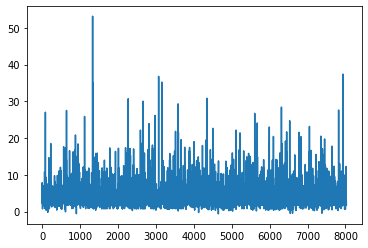

In [63]:
plt.plot(df['Pitching'])

In [67]:
df[df['Pitching'] == df['Pitching'].max()]

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,IP,K/9,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching
1333,cleaj101,0.83,0,0,1,5,7,0,3,1,...,0.000019,27.0,81.0,0.0,1.0,12.5,189.0,23.54,-0.1,53.138


<p>This immediately demonstrates an issue with our Pitching stat - a player with very few appearances, but who did well in those appearances, will be skewed too high. We need to also take innings pitched into account.</p>

In [91]:
df['Pitching'] = df[['K%', 'ERA', 'FIP', 'WAR']].mean(axis=1).round(3) * df['IP']

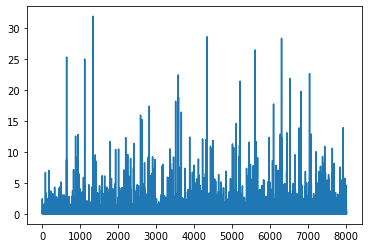

In [92]:
plt.plot(df['Pitching'])

In [93]:
df[df['Pitching'] == df['Pitching'].max()]

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,IP,K/9,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching
1341,clemr001,0.2308,118,46,14750,4185,1707,363,1580,4672,...,0.909717,8.55,2.89,0.66,0.284,74.6,3.12,3.09,133.7,31.871935


<p>This looks like it worked, but let's explore deeper.</p>

In [94]:
df['Pitching'].mean()

0.49352977097414313

In [95]:
df['Pitching'].min()

-5.0887375e-05

In [96]:
df['Pitching'].max()

31.871935094999998

In [97]:
df.sort_values('Pitching').tail(10)

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,IP,K/9,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching
5219,niekp001,0.2570,245,45,16213,5044,2012,482,1809,3342,...,1.000000,5.57,3.01,0.80,0.270,73.6,3.35,3.62,78.5,21.404000
6529,seavt001,0.2285,231,61,14348,3971,1521,380,1390,3640,...,0.884921,6.85,2.62,0.72,0.259,76.7,2.86,3.04,92.7,21.854894
3588,johnr005,0.2252,100,37,12406,3346,1513,411,1497,4875,...,0.765178,10.61,3.26,0.89,0.291,74.7,3.29,3.19,110.4,22.412829
7049,suttd001,0.2376,178,58,15847,4692,1914,472,1343,3574,...,0.977406,6.09,2.29,0.80,0.261,73.6,3.26,3.24,85.9,22.618152
1121,carls001,0.2546,254,55,15652,4672,1864,414,1833,4136,...,0.965397,7.13,3.16,0.71,0.279,74.1,3.22,3.15,96.9,24.969993
645,blylb001,0.2487,242,60,14910,4632,1830,430,1322,3701,...,0.919672,6.70,2.39,0.78,0.282,74.1,3.31,3.19,103.3,25.286382
5607,perrg101,0.2540,303,53,16051,4938,1846,399,1379,3534,...,0.990008,5.94,2.32,0.67,0.275,73.3,3.11,3.06,100.5,26.441134
6311,ryann001,0.2088,222,61,16158,3923,1911,321,2795,5714,...,0.996651,9.55,4.67,0.54,0.265,73.1,3.19,2.97,107.2,28.307878
4347,maddg002,0.2553,109,35,15025,4726,1756,353,999,3371,...,0.926722,6.06,1.80,0.63,0.281,72.3,3.16,3.26,116.7,28.562499
1341,clemr001,0.2308,118,46,14750,4185,1707,363,1580,4672,...,0.909717,8.55,2.89,0.66,0.284,74.6,3.12,3.09,133.7,31.871935


In [98]:
df[df['retroID'] == 'kersc001']

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,IP,K/9,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching
3761,kersc001,0.2105,25,15,6824,1715,617,173,577,2464,...,0.420829,9.75,2.28,0.68,0.27,79.4,2.44,2.74,64.5,7.359878


<p>This looks good, but we intuitively see a problem with the Pitching stat. ERA and FIP are part of the average, but a low ERA/FIP is better than a high one. We need to subtract them rather than add. With this change, I'm going to see how the stat looks without taking IP into account.</p>

In [132]:
df['-ERA'] = 0 - df['ERA']
df['-FIP'] = 0 - df['FIP']

In [133]:
df

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching,-ERA,-FIP
0,aardd001,0.2574,0,0,1011,296,160,41,183,340,...,4.89,1.09,0.285,74.5,4.27,4.45,1.1,-1.847,-4.27,-4.45
1,aased001,0.2508,22,5,3328,1085,468,89,457,641,...,3.71,0.72,0.282,73.4,3.80,3.85,11.7,1.046,-3.80,-3.85
2,abadf001,0.2447,0,0,992,309,135,42,116,280,...,3.16,1.14,0.281,77.7,3.67,4.24,0.6,-1.777,-3.67,-4.24
3,abbog001,0.2786,37,5,3858,1405,627,162,352,484,...,2.46,1.13,0.278,69.3,4.39,4.46,10.2,0.359,-4.39,-4.46
4,abboj001,0.2804,31,6,5022,1779,791,154,620,888,...,3.33,0.83,0.295,70.0,4.25,4.25,22.7,3.581,-4.25,-4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,zolds101,0.2700,30,5,2788,956,366,54,301,207,...,2.91,0.52,0.267,70.7,3.54,3.80,9.3,0.503,-3.54,-3.80
8021,zubeb101,0.2717,23,3,2358,767,374,35,468,383,...,5.36,0.40,0.283,69.0,4.28,3.96,3.3,-1.207,-4.28,-3.96
8022,zumaj001,0.2286,0,0,629,169,71,18,114,210,...,4.89,0.77,0.267,78.7,3.00,3.94,2.7,-1.002,-3.00,-3.94
8023,zuveg101,0.2760,9,2,1927,660,253,56,203,223,...,2.84,0.78,0.270,73.2,3.54,3.93,1.9,-1.372,-3.54,-3.93


In [134]:
df['Pitching'] = df[['K%', '-ERA', '-FIP', 'WAR']].mean(axis=1).round(3)

In [135]:
df.sort_values('Pitching').tail(10)

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching,-ERA,-FIP
7049,suttd001,0.2376,178,58,15847,4692,1914,472,1343,3574,...,2.29,0.80,0.261,73.6,3.26,3.24,85.9,19.891,-3.26,-3.24
2824,grovl101,0.2535,298,35,11822,3849,1339,162,1187,2266,...,2.71,0.37,0.284,71.8,3.06,3.36,88.8,20.629,-3.06,-3.36
6529,seavt001,0.2285,231,61,14348,3971,1521,380,1390,3640,...,2.62,0.72,0.259,76.7,2.86,3.04,92.7,21.747,-2.86,-3.04
1121,carls001,0.2546,254,55,15652,4672,1864,414,1833,4136,...,3.16,0.71,0.279,74.1,3.22,3.15,96.9,22.680,-3.22,-3.15
5607,perrg101,0.2540,303,53,16051,4938,1846,399,1379,3534,...,2.32,0.67,0.275,73.3,3.11,3.06,100.5,23.623,-3.11,-3.06
645,blylb001,0.2487,242,60,14910,4632,1830,430,1322,3701,...,2.39,0.78,0.282,74.1,3.31,3.19,103.3,24.245,-3.31,-3.19
6311,ryann001,0.2088,222,61,16158,3923,1911,321,2795,5714,...,4.67,0.54,0.265,73.1,3.19,2.97,107.2,25.323,-3.19,-2.97
3588,johnr005,0.2252,100,37,12406,3346,1513,411,1497,4875,...,3.26,0.89,0.291,74.7,3.29,3.19,110.4,26.051,-3.29,-3.19
4347,maddg002,0.2553,109,35,15025,4726,1756,353,999,3371,...,1.80,0.63,0.281,72.3,3.16,3.26,116.7,27.611,-3.16,-3.26
1341,clemr001,0.2308,118,46,14750,4185,1707,363,1580,4672,...,2.89,0.66,0.284,74.6,3.12,3.09,133.7,31.930,-3.12,-3.09


In [136]:
df[df['retroID'] == 'kersc001']

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching,-ERA,-FIP
3761,kersc001,0.2105,25,15,6824,1715,617,173,577,2464,...,2.28,0.68,0.27,79.4,2.44,2.74,64.5,14.899,-2.44,-2.74


In [137]:
df[df['retroID'] == 'johnr005']

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching,-ERA,-FIP
3588,johnr005,0.2252,100,37,12406,3346,1513,411,1497,4875,...,3.26,0.89,0.291,74.7,3.29,3.19,110.4,26.051,-3.29,-3.19


In [138]:
df[df['retroID'] == 'bumgm001']

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching,-ERA,-FIP
942,bumgm001,0.2358,15,6,5538,1622,642,192,428,1794,...,2.09,0.94,0.284,76.4,3.13,3.32,31.3,6.272,-3.13,-3.32


In [139]:
df[df['retroID'] == 'mahop001']

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching,-ERA,-FIP
4377,mahop001,0.2751,0,0,2127,738,431,116,392,452,...,4.98,1.47,0.284,69.5,5.47,5.62,-3.0,-3.487,-5.47,-5.62


In [140]:
df[df['retroID'] == 'coleg001']

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching,-ERA,-FIP
1383,coleg001,0.2381,2,1,3585,1034,427,115,315,1336,...,2.37,0.87,0.303,75.6,3.22,3.06,28.8,5.699,-3.22,-3.06


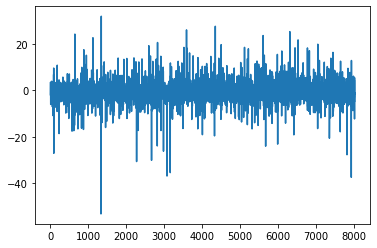

In [141]:
plt.plot(df['Pitching'])

In [131]:
df.sort_values('Pitching').head(10)

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching,-ERA,-FIP
1333,cleaj101,0.83,0,0,1,5,7,0,3,1,...,81.0,0.0,1.00,12.5,189.0,23.54,-0.1,-53.132,-189.0,-23.54
7932,wurmf101,0.50,0,0,1,1,4,0,5,1,...,135.0,0.0,1.00,33.3,108.0,41.54,-0.1,-37.374,-108.0,-41.54
3074,heart001,0.75,0,0,1,3,4,0,4,0,...,108.0,0.0,0.75,28.6,108.0,39.21,-0.1,-36.828,-108.0,-39.21
3159,herne001,0.50,0,0,1,1,3,1,2,0,...,54.0,27.0,0.00,0.0,81.0,60.16,-0.3,-35.365,-81.0,-60.16
2272,fishf101,0.66,0,0,1,2,4,0,2,1,...,54.0,0.0,1.00,0.0,108.0,14.60,0.0,-30.600,-108.0,-14.60
2666,gomec002,0.00,0,0,1,0,3,0,4,0,...,108.0,0.0,0.00,25.0,81.0,39.16,-0.1,-30.065,-81.0,-39.16
7819,wilst104,0.00,0,0,1,0,3,0,2,0,...,54.0,0.0,0.00,0.0,81.0,29.57,-0.1,-27.667,-81.0,-29.57
88,alexm001,0.50,0,0,2,1,5,1,4,0,...,54.0,13.5,0.00,0.0,67.5,40.67,-0.1,-27.068,-67.5,-40.67
2981,harll101,0.50,0,0,2,2,5,1,4,1,...,54.0,13.5,0.50,21.7,67.5,37.08,-0.1,-26.139,-67.5,-37.08
5674,pickr001,0.60,0,0,2,3,6,0,4,2,...,54.0,0.0,1.00,14.3,81.0,15.14,0.0,-23.979,-81.0,-15.14


<p>I'm happy with this. The new Pitching stat somewhat reflects its component parts but doesn't immediately align with WAR. We don't just want to recreate WAR so that's a good thing.</p>

<h2>Normalization</h2>

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler = MinMaxScaler()

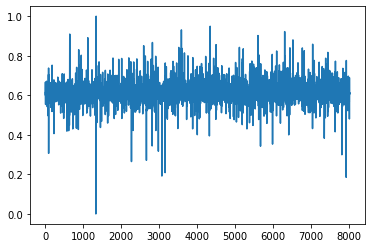

In [144]:
plt.plot(scaler.fit_transform(df[['Pitching']]))

In [145]:
df['Pitching'] = scaler.fit_transform(df[['Pitching']])

In [147]:
df.sort_values('Pitching').head(10)

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching,-ERA,-FIP
1333,cleaj101,0.83,0,0,1,5,7,0,3,1,...,81.0,0.0,1.00,12.5,189.0,23.54,-0.1,0.000000,-189.0,-23.54
7932,wurmf101,0.50,0,0,1,1,4,0,5,1,...,135.0,0.0,1.00,33.3,108.0,41.54,-0.1,0.185253,-108.0,-41.54
3074,heart001,0.75,0,0,1,3,4,0,4,0,...,108.0,0.0,0.75,28.6,108.0,39.21,-0.1,0.191672,-108.0,-39.21
3159,herne001,0.50,0,0,1,1,3,1,2,0,...,54.0,27.0,0.00,0.0,81.0,60.16,-0.3,0.208871,-81.0,-60.16
2272,fishf101,0.66,0,0,1,2,4,0,2,1,...,54.0,0.0,1.00,0.0,108.0,14.60,0.0,0.264889,-108.0,-14.60
2666,gomec002,0.00,0,0,1,0,3,0,4,0,...,108.0,0.0,0.00,25.0,81.0,39.16,-0.1,0.271179,-81.0,-39.16
7819,wilst104,0.00,0,0,1,0,3,0,2,0,...,54.0,0.0,0.00,0.0,81.0,29.57,-0.1,0.299370,-81.0,-29.57
88,alexm001,0.50,0,0,2,1,5,1,4,0,...,54.0,13.5,0.00,0.0,67.5,40.67,-0.1,0.306412,-67.5,-40.67
2981,harll101,0.50,0,0,2,2,5,1,4,1,...,54.0,13.5,0.50,21.7,67.5,37.08,-0.1,0.317333,-67.5,-37.08
5674,pickr001,0.60,0,0,2,3,6,0,4,2,...,54.0,0.0,1.00,14.3,81.0,15.14,0.0,0.342726,-81.0,-15.14


In [148]:
df.sort_values('Pitching').tail(10)

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching,-ERA,-FIP
7049,suttd001,0.2376,178,58,15847,4692,1914,472,1343,3574,...,2.29,0.80,0.261,73.6,3.26,3.24,85.9,0.858468,-3.26,-3.24
2824,grovl101,0.2535,298,35,11822,3849,1339,162,1187,2266,...,2.71,0.37,0.284,71.8,3.06,3.36,88.8,0.867144,-3.06,-3.36
6529,seavt001,0.2285,231,61,14348,3971,1521,380,1390,3640,...,2.62,0.72,0.259,76.7,2.86,3.04,92.7,0.880287,-2.86,-3.04
1121,carls001,0.2546,254,55,15652,4672,1864,414,1833,4136,...,3.16,0.71,0.279,74.1,3.22,3.15,96.9,0.891256,-3.22,-3.15
5607,perrg101,0.2540,303,53,16051,4938,1846,399,1379,3534,...,2.32,0.67,0.275,73.3,3.11,3.06,100.5,0.902342,-3.11,-3.06
645,blylb001,0.2487,242,60,14910,4632,1830,430,1322,3701,...,2.39,0.78,0.282,74.1,3.31,3.19,103.3,0.909654,-3.31,-3.19
6311,ryann001,0.2088,222,61,16158,3923,1911,321,2795,5714,...,4.67,0.54,0.265,73.1,3.19,2.97,107.2,0.922327,-3.19,-2.97
3588,johnr005,0.2252,100,37,12406,3346,1513,411,1497,4875,...,3.26,0.89,0.291,74.7,3.29,3.19,110.4,0.930886,-3.29,-3.19
4347,maddg002,0.2553,109,35,15025,4726,1756,353,999,3371,...,1.80,0.63,0.281,72.3,3.16,3.26,116.7,0.949225,-3.16,-3.26
1341,clemr001,0.2308,118,46,14750,4185,1707,363,1580,4672,...,2.89,0.66,0.284,74.6,3.12,3.09,133.7,1.000000,-3.12,-3.09


<p>Finally, we should get rid of the -ERA and -FIP columns.</p>

In [149]:
df = df.drop(columns=['-ERA', '-FIP'])

In [150]:
df

,retroID,BAOpp,CG,SHO,IPouts,H,ER,HR,BB,SO,...,IP,K/9,BB/9,HR/9,BABIP,LOB%,ERA,FIP,WAR,Pitching
0,aardd001,0.2574,0,0,1011,296,160,41,183,340,...,0.062360,9.08,4.89,1.09,0.285,74.5,4.27,4.45,1.1,0.602913
1,aased001,0.2508,22,5,3328,1085,468,89,457,641,...,0.205233,5.20,3.71,0.72,0.282,73.4,3.80,3.85,11.7,0.636924
2,abadf001,0.2447,0,0,992,309,135,42,116,280,...,0.061102,7.62,3.16,1.14,0.281,77.7,3.67,4.24,0.6,0.603736
3,abbog001,0.2786,37,5,3858,1405,627,162,352,484,...,0.237967,3.39,2.46,1.13,0.278,69.3,4.39,4.46,10.2,0.628847
4,abboj001,0.2804,31,6,5022,1779,791,154,620,888,...,0.309765,4.77,3.33,0.83,0.295,70.0,4.25,4.25,22.7,0.666725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,zolds101,0.2700,30,5,2788,956,366,54,301,207,...,0.171925,2.00,2.91,0.52,0.267,70.7,3.54,3.80,9.3,0.630540
8021,zubeb101,0.2717,23,3,2358,767,374,35,468,383,...,0.145445,4.39,5.36,0.40,0.283,69.0,4.28,3.96,3.3,0.610437
8022,zumaj001,0.2286,0,0,629,169,71,18,114,210,...,0.038711,9.01,4.89,0.77,0.267,78.7,3.00,3.94,2.7,0.612847
8023,zuveg101,0.2760,9,2,1927,660,253,56,203,223,...,0.118817,3.12,2.84,0.78,0.270,73.2,3.54,3.93,1.9,0.608497
